# PROGRAM STATEMENT

Write a program to implement K-Means clustering to cluster the Spinem data set.

# CODE

In [ ]:
# importing pandas libray for CSV file I/O
import pandas as pd
# Importing the dataset
df = pd.read_csv("spinem.csv")

In [ ]:
print('First row of the dataset: ')
print(df.head(1))

First row of the dataset: 
   pelvic_incidence  pelvic_tilt  pelvic_incidence.1   sacral_slope   \
0         63.027817    22.552586           39.609117       40.475232   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      98.672917                   -0.2544      0.744503      12.5661   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0         14.5386       15.30468    -28.658501          43.5123  


In [ ]:
print('Shape of the Data frame: ', df.shape)

Shape of the Data frame:  (310, 12)


In [ ]:
print("The summary of dataset: ")
print(df.info())

The summary of dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   pelvic_incidence.1        310 non-null    float64
 3    sacral_slope             310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
dtypes: float64(12)
memory usage: 29.2 KB
None


In [ ]:
print("Check for missing values: ")
print(df.isnull().sum())

Check for missing values: 
pelvic_incidence            0
pelvic_tilt                 0
pelvic_incidence.1          0
 sacral_slope               0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
dtype: int64


In [ ]:
# There are no missing values in variables

In [ ]:
# Declaring the feature
X = df[['pelvic_incidence', 'pelvic_radius', 'thoracic_slope']]

In [ ]:
# Importing the model
from sklearn.cluster import KMeans
# Instantiating the model
kmeans = KMeans(n_clusters = 3, random_state = 123)
# Fitting the model
model = kmeans.fit(X)

In [ ]:
# make predictions on the set
cluster_labels = kmeans.predict(X)

In [ ]:
# Creating a new column Cluster
# signifies the cluster to which the observation belong
X.insert(3, "Cluster", cluster_labels, True)

In [ ]:
# The new dataframe with Cluster Column
print(X)

     pelvic_incidence  pelvic_radius  thoracic_slope  Cluster
0           63.027817      98.672917         14.5386        2
1           39.056951     114.405425         17.5323        0
2           68.832021     105.985135         17.4861        2
3           69.297008     101.868495         12.7074        2
4           49.712859     108.168725         15.9546        2
..                ...            ...             ...      ...
305         47.903565     117.449062         14.7484        0
306         53.936748     114.365845         18.1972        0
307         61.446597     125.670725         13.5565        0
308         45.252792     118.545842         16.0928        0
309         33.841641     123.945244         17.6963        0

[310 rows x 4 columns]


In [ ]:
# The Centres of the Clusters
C = kmeans.cluster_centers_
print("The centres of the 3 clusters are as follows: ")
print(C)

The centres of the 3 clusters are as follows: 
[[ 46.42903837 124.47018491  13.26250567]
 [ 80.49567418 120.00557969  12.78133516]
 [ 62.59438009 103.64870812  13.03697051]]


In [ ]:
# importing metrics to calculate silhouette score
from sklearn import metrics
sil = metrics.silhouette_score(X, cluster_labels, 
                               metric='euclidean',sample_size = len(df))
print("Quality of Clustering: ", sil)

Quality of Clustering:  0.3539586349354204


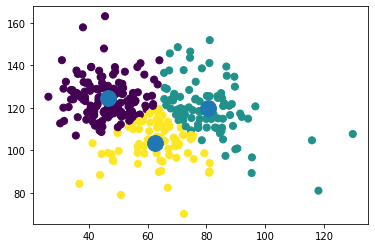

In [ ]:
# 2-D plot of data points along with the centroids
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(X['pelvic_incidence'], X['pelvic_radius'], c=cluster_labels,
            s=50, cmap='viridis');
plt.scatter(C[:, 0], C[:, 1], marker='.', s=1000)
plt.show()

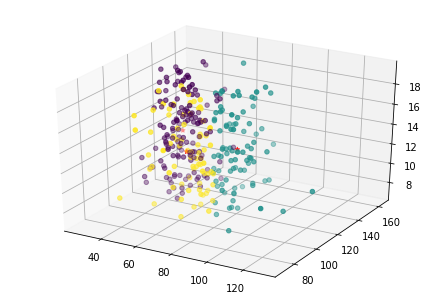

In [ ]:
# 3-D plot of daa points along with the centroids
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['pelvic_incidence'], X['pelvic_radius'], 
           X['thoracic_slope'], 
           c=cluster_labels,
          cmap='viridis');
ax.scatter(C[:, 0], C[:, 1],  C[:, 2], 
           marker='*', 
           c='#FF0000')
plt.show()

In [1]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('K Means Clustering.ipynb')